# EDA To Prediction(DieTanic)

## part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/SAMSUNG/OneDrive\바탕 화면/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

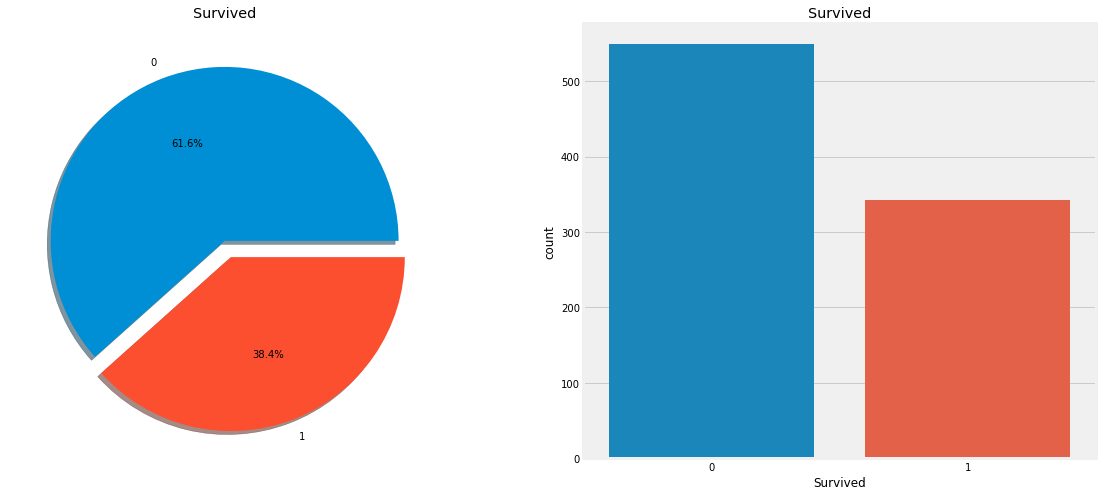

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
#autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 
#'%1.1f%%' : 전체길이지정, 소수점 한자리까지 표시하도록 설정했습니다.
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 1)Analysis of the features.

#### Categorical Feature - Sex

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

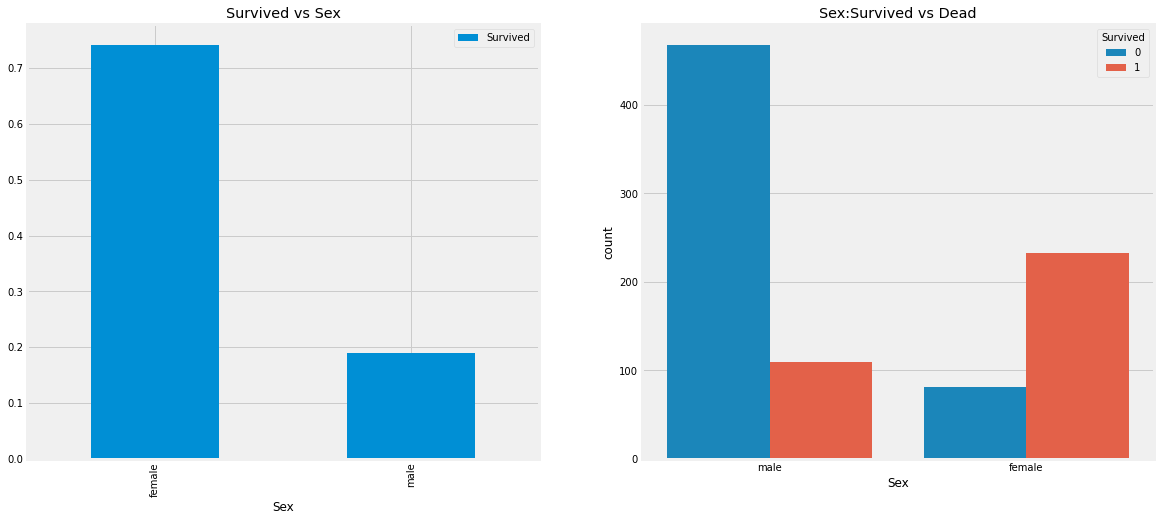

In [7]:
f,ax=plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Ordinal Feature - Pclass

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


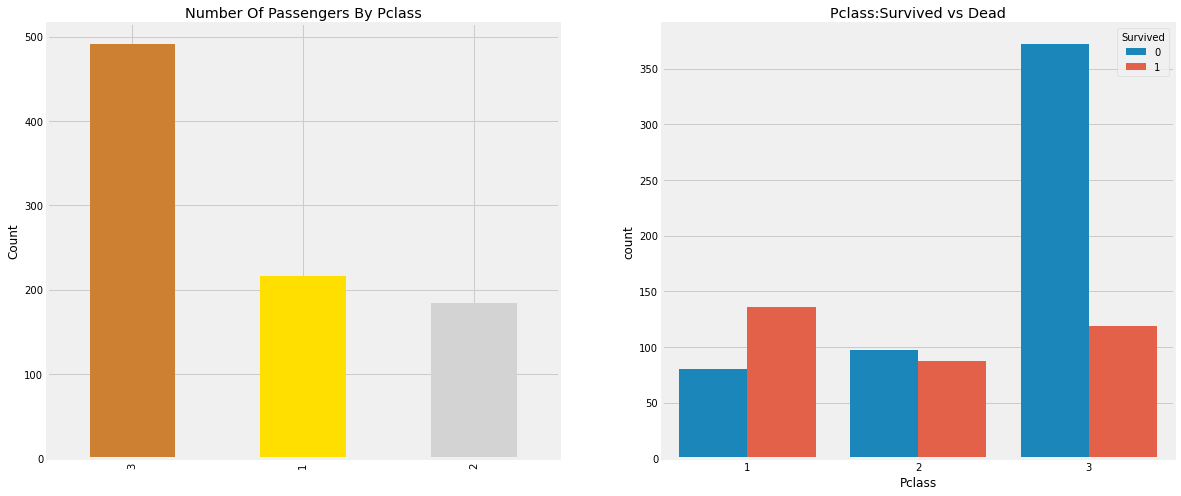

In [9]:
f,ax=plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

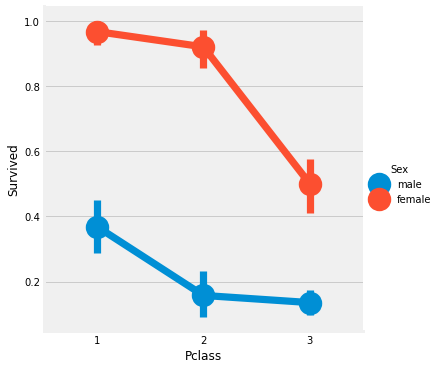

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

#### Continuous Feature

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


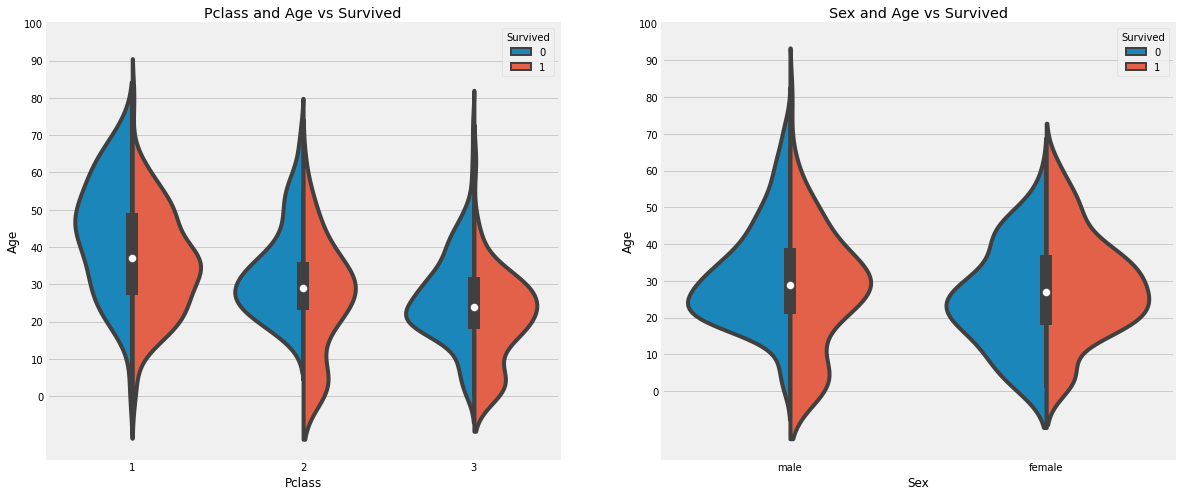

In [13]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Name feature

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    #lets extract the Salutations

In [15]:
#checking the Initials with the Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme', 'Ms', 'Dr', 'Major', 'Lady',
                         'Countess', 'Jonkheer', 'Col', 'Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                         'Other','Mr','Mr','Mr'],inplace=True)

In [17]:
#checking the average age by Initials
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [19]:
data.Age.isnull().any()

False

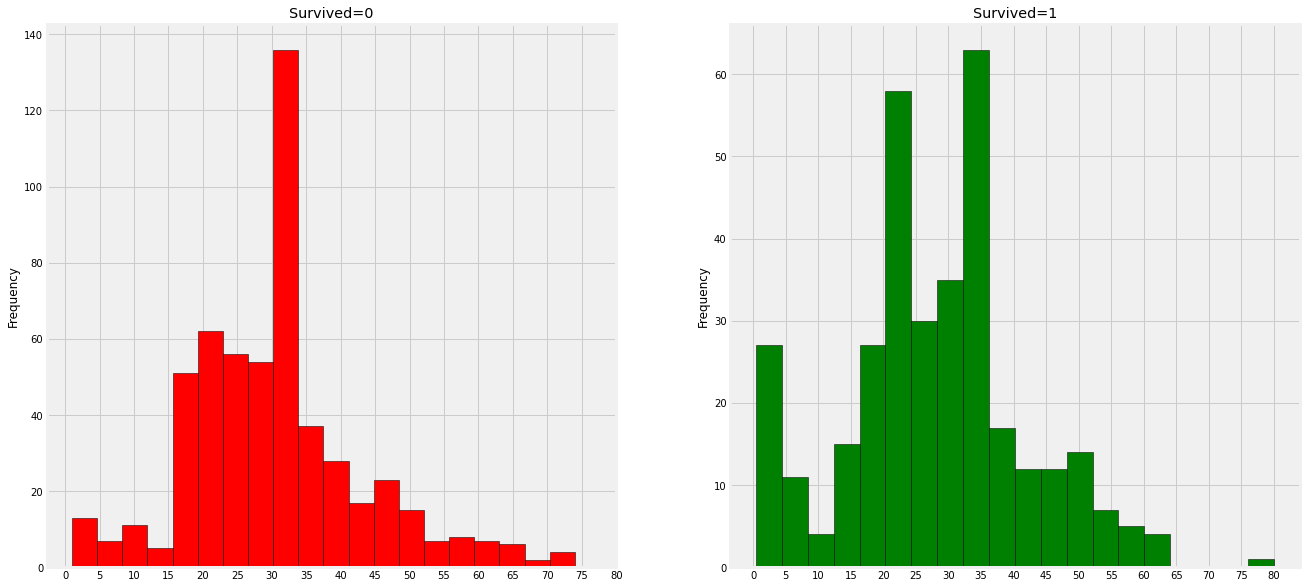

In [20]:
f,ax=plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

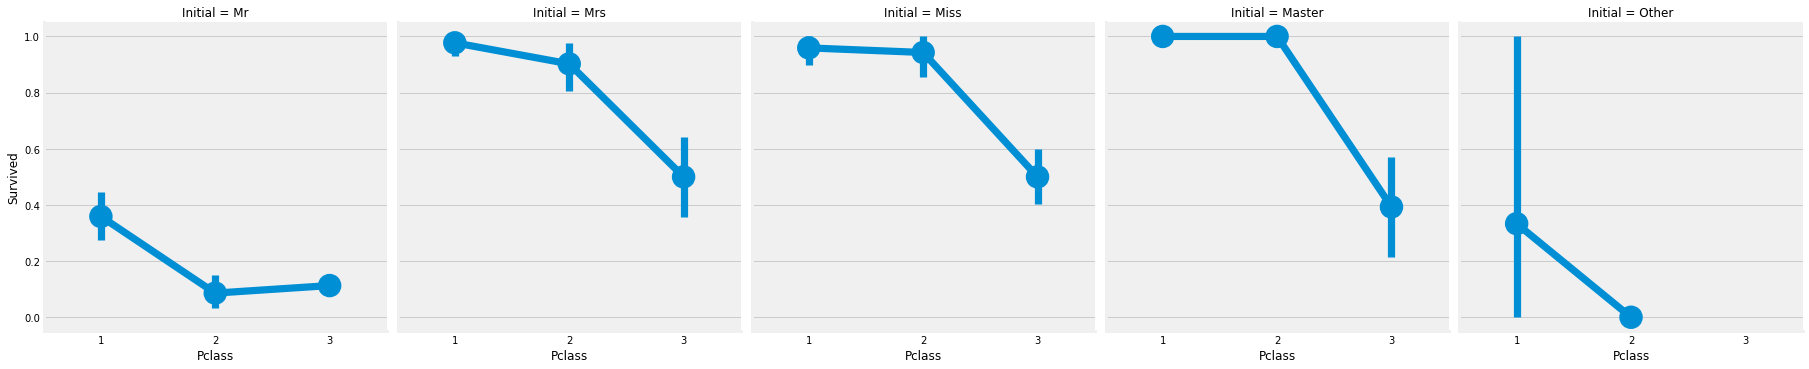

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

#### Categorical Value - Embarked

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

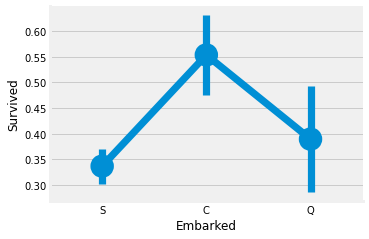

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

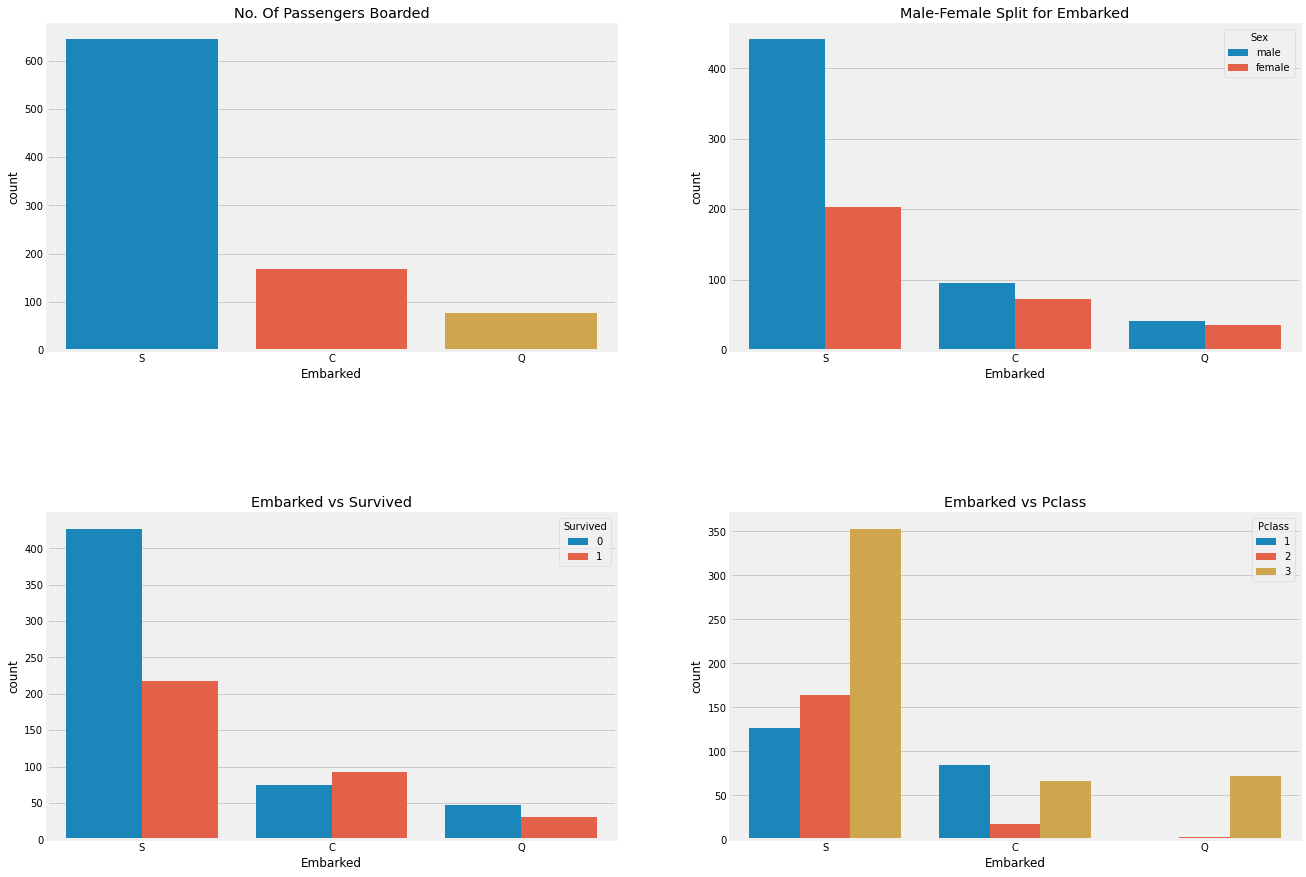

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#1)Maximum passengers boarded from S. Majority of them veing from Pclass3.
#2)The Passengers from C look to be lucky as a good proportion of them survived.
#The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers
#3)The Embark S looks to the port from where majority of the rich people boarded. 
#Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
#4)Port Q had almost 95% of the passengers were from Pclass3.

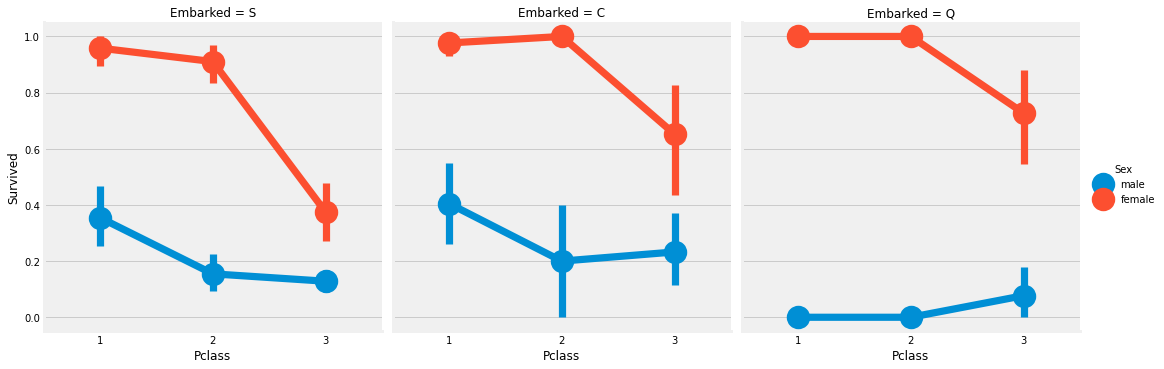

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [26]:
#FIlling Embarked NaN

In [27]:
data['Embarked'].fillna('S', inplace=True)

In [28]:
data.Embarked.isnull().any()

False

#### Discrete Feature - SibSip

In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


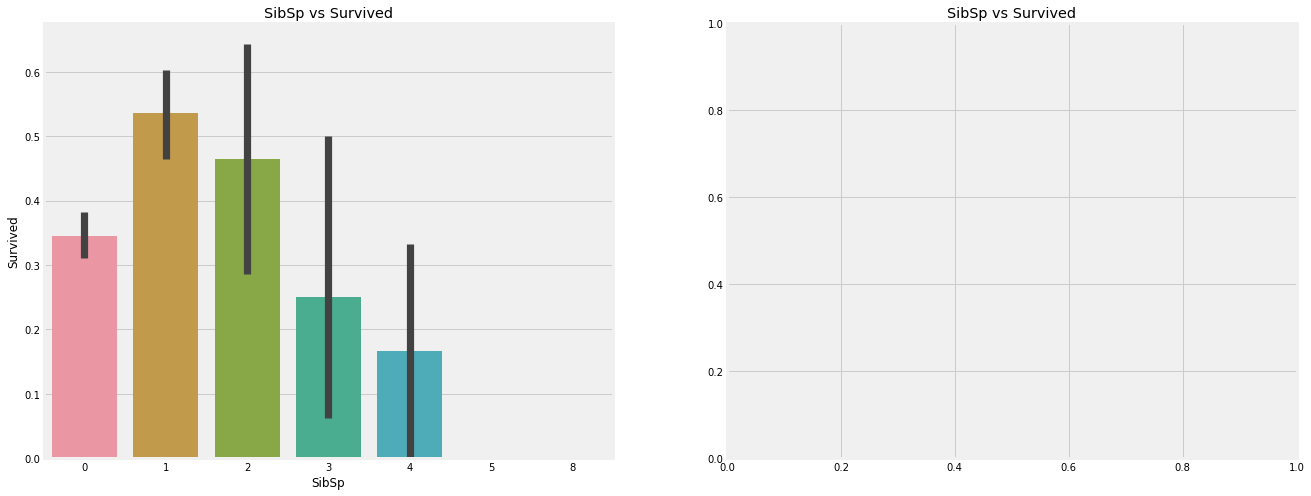

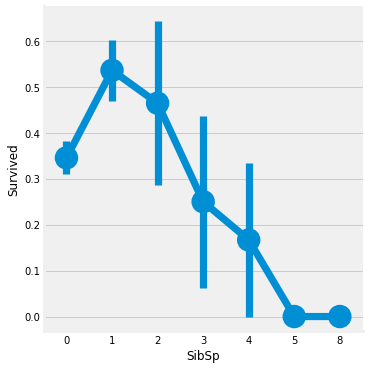

In [30]:
f,ax=plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Discrete Feature - Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')
#The crosstab again shows that larger families were in Pclass3

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


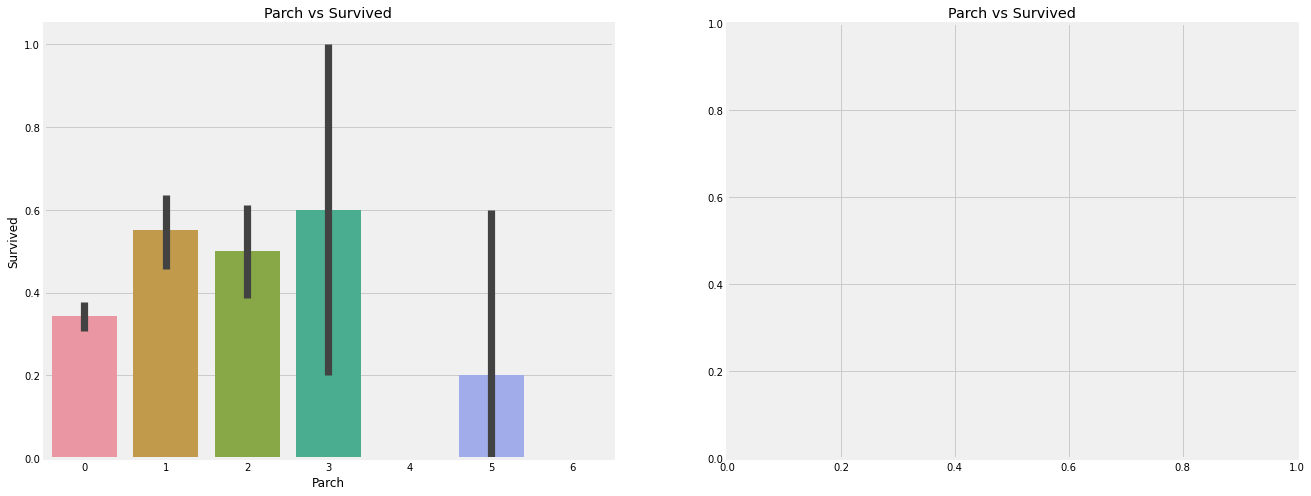

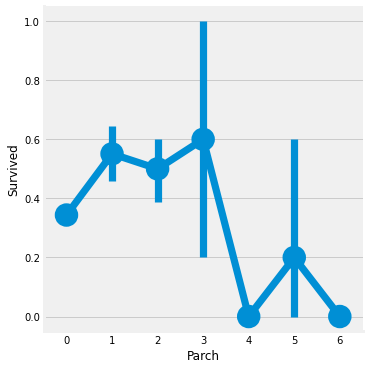

In [33]:
f,ax=plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
# plt.close(2)
plt.show()

#### Continuous Feature - Fare

In [34]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


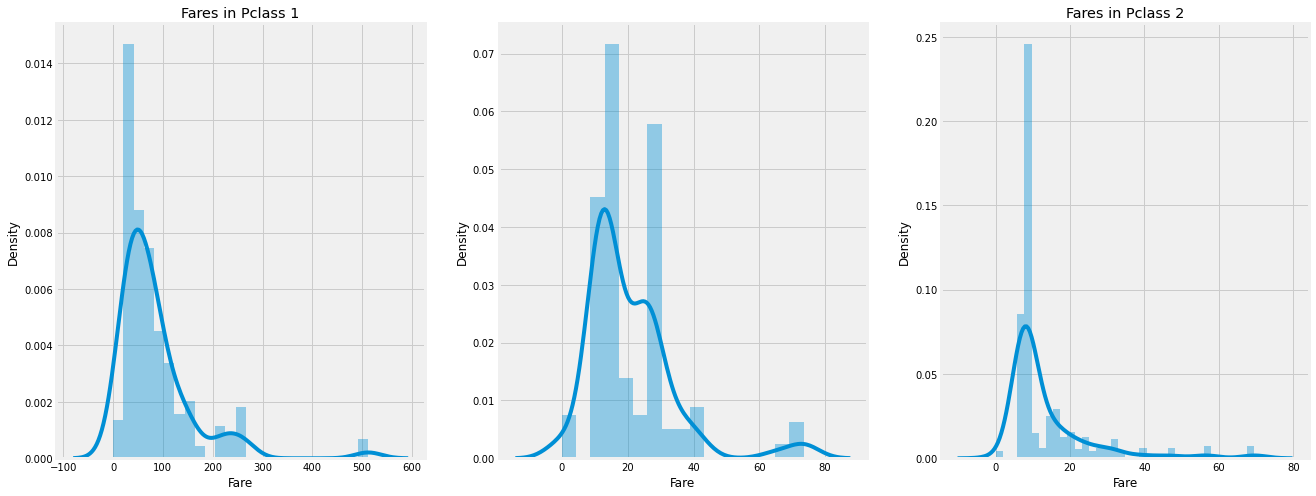

In [35]:
f,ax=plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[2].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
plt.show()
#There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on devreasing as the standards reduces.
#As this is also continous, we can convert into discrete values by using binning.

Observations in Nutshell for all features: 

Sex : The chance of survival for women is high as compared to men.

Pclass : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low.
For women, the chanve of survival from Pclass1 is almost 1 and is high too for those from Pclass2. 

Age : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked : This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.
Passengers at Q were all from Pclass3.

Parch+SIbSp : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family traveling with you.

### Corralation Between The Features

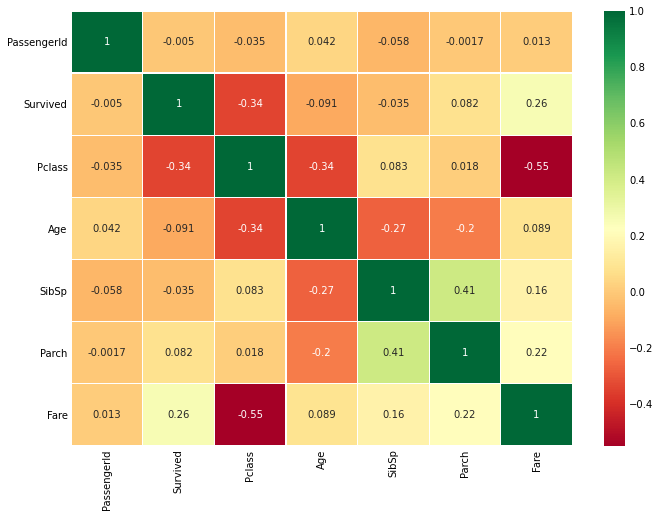

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
#data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Part2: Feature Engineering and Data Cleaning 

### Age_band 
Problem With Age Feature: 
As I have mentioned earlier that Age is a continuous feature, there is a problem with Continous Variables in Machine Learning Models.

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


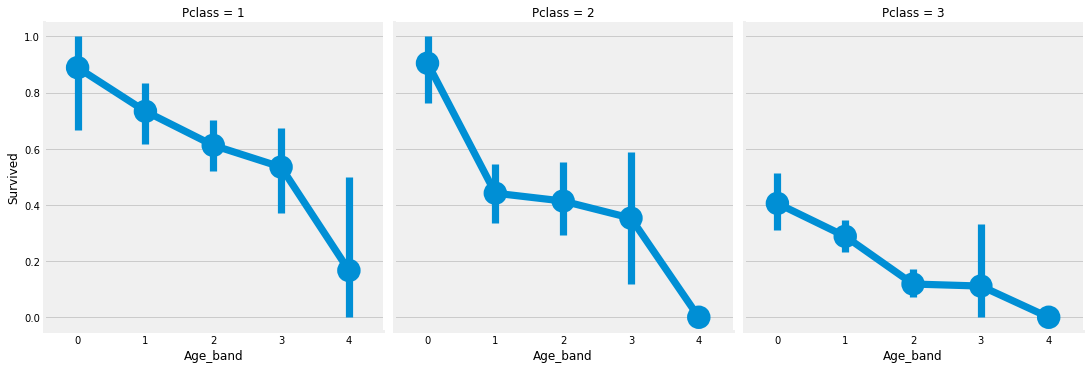

In [39]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

### Family_Size and Alone
At this point, we can creatre a new feature called "Family_size" and "Alone" and analyse it.

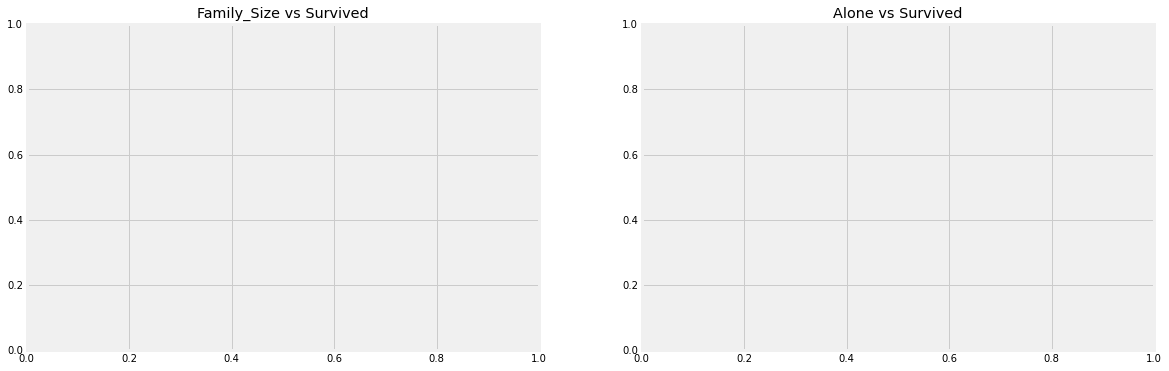

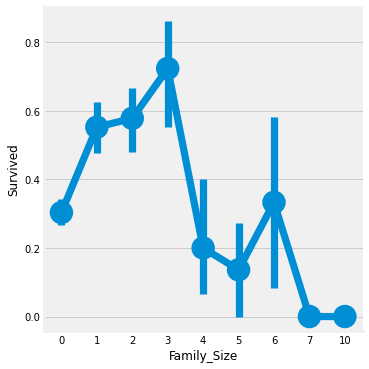

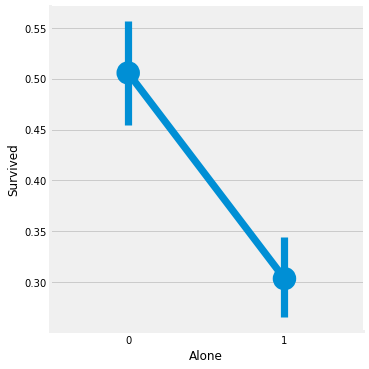

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

f,ax=plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

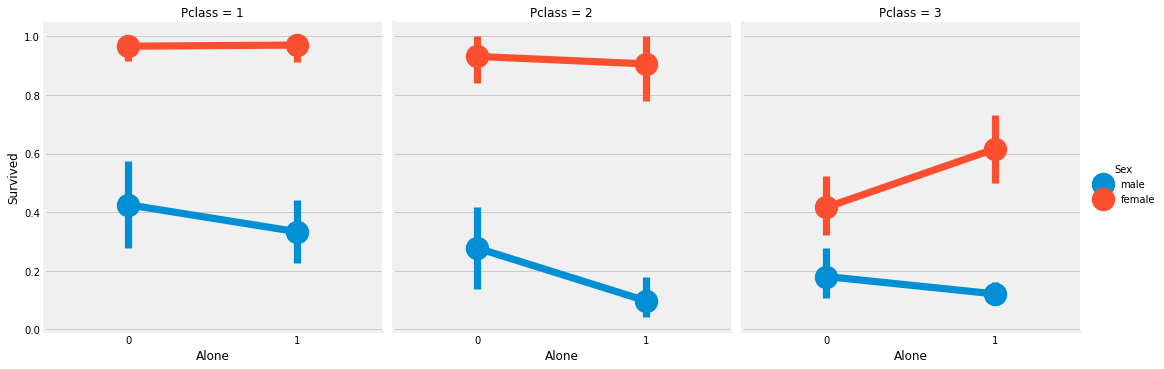

In [41]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass')
plt.show()

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

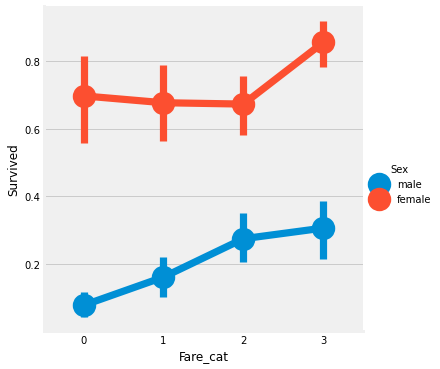

In [44]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()
#Clearly, as the Fare_cat increases, the survival chances increases.
#This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Name -> We don't need name feature as it cannot be converted into any categorical value.

Age -> We have the Age_band feature, so no need of this.

Ticket -> It is any random string that cannot be categorised.

Fare -> We have the Fare_cat feature, so unneeded.

Cabin -> A lot of NaN values and also many passengers have multiple cabins.

Fare_Range -> We have the fare_cat feature.

PassengerId -> Cannot be categorised.

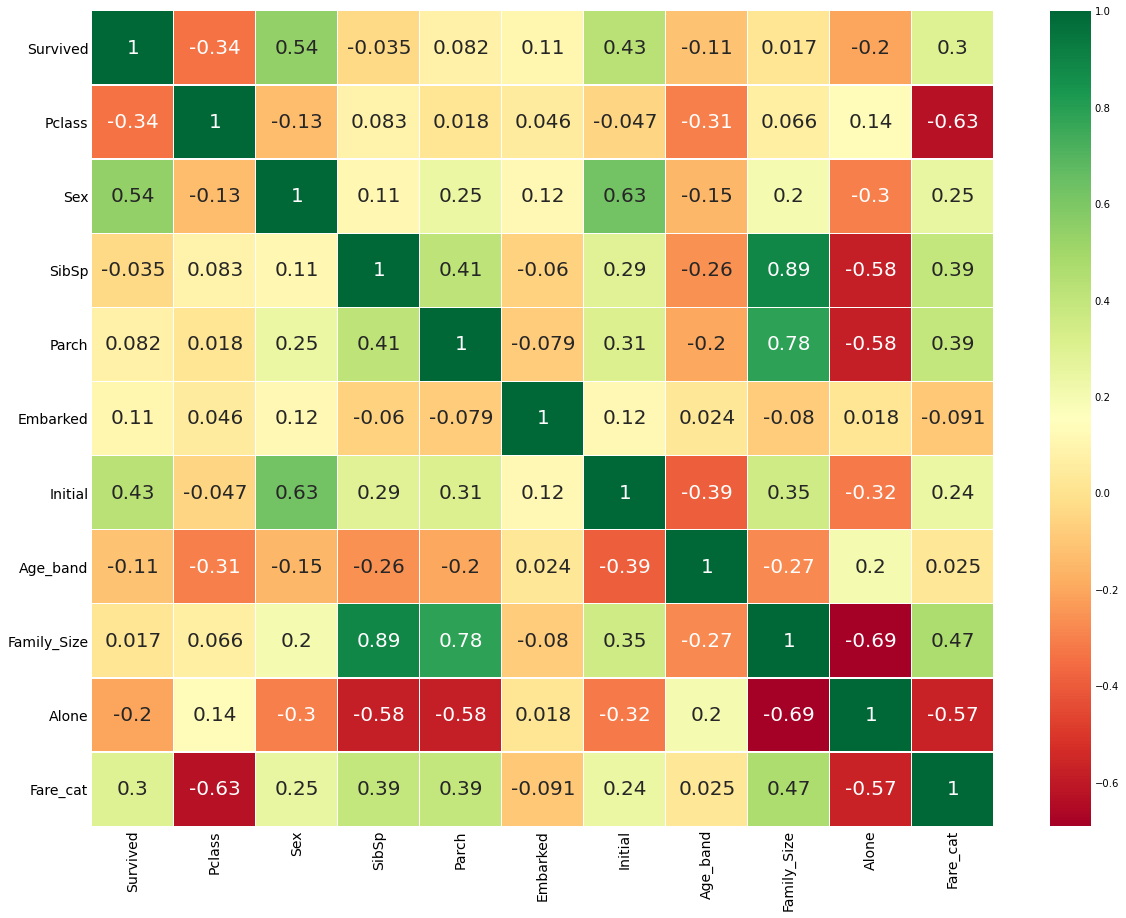

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Predictive Modeling 

In [47]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Radom Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
train,test= train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]] #0: Survived 제외 train.columns: 컬럼의 인덱스 뽑기 
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [49]:
train.columns[1:]

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

#### Radial Support Vector Machines(rbf_SVM)

In [50]:
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [51]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [52]:
model=LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [53]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


#### K-Nearest Neighbours(KNN)

In [54]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


###### Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

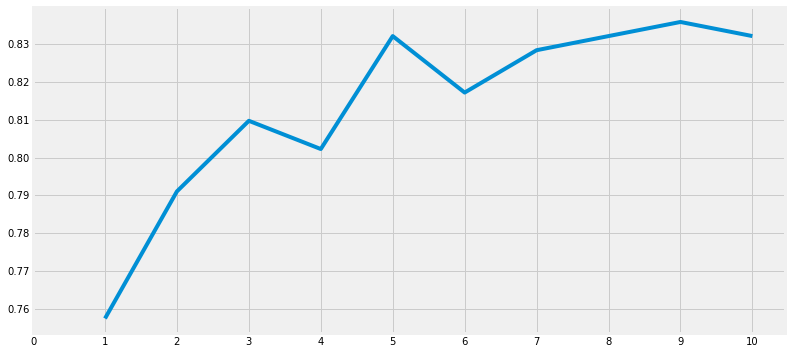

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [55]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [56]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [57]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


### Cross Validation

In [58]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold= KFold(n_splits=10, random_state=22, shuffle=True) #k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
            'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model=i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2           

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.810350,0.041748
Naive Bayes,0.795843,0.054861
Random Forest,0.809263,0.046000


<AxesSubplot:>

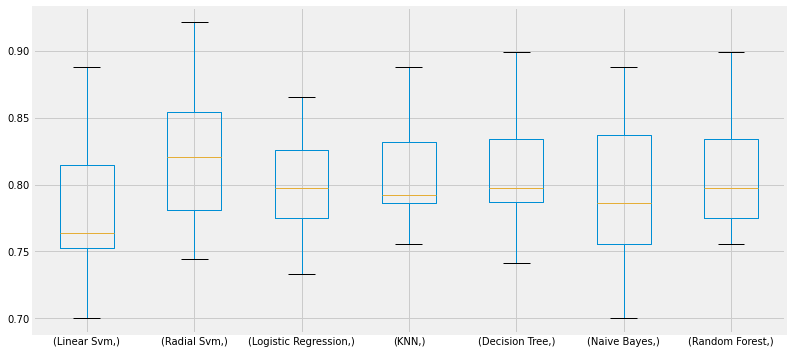

In [59]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

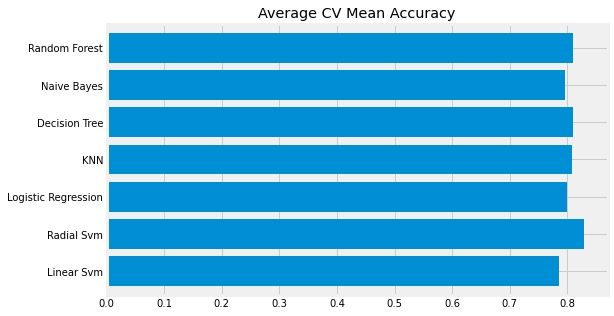

In [60]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### Confusion Matrix

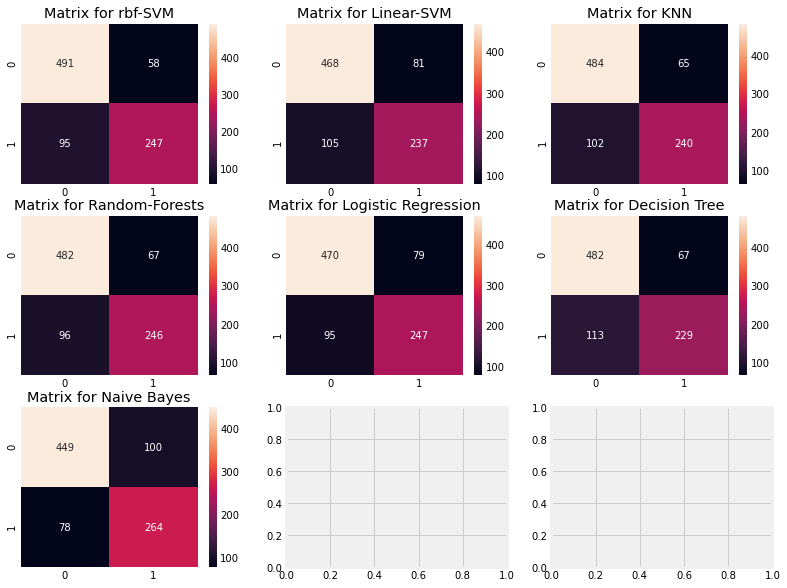

In [61]:
f, ax=plt.subplots(3,3, figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred=cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred=cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred=cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred=cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

##### Interpreting Confusion Matrix
THe left diagonal shows the number of correct predictions made for each class while the right diagonal show the number of wrong predictions made. Let's consider the first plot for rbf-SVM

1)The no. of correct predictions are 491(for dead)+247(for survived) with the mean CV accuracy being (491+247)/891=82.8% which we did get earlier.

2)Errors-> Wrongly Classified 58 dead people as survived and 95 survived as dead. 
Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

#### Hyper-Parameters Tuning

In [62]:
#SVM
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

#The best score for Rbf_Svm is 82.82% with C=0.4 and gamma=0.3

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [63]:
#Random Forests
n_estimators=range(100, 1000, 100)
hyper={'n_estimators': n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

#For RandomForest. score is abt 81.9% with n_estimators=300.

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


### Ensembling
Ensembling is a godd way to increase the accuracy or performance of a model. 
In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves ths stability of the model. Ensembling can be done in ways like:

1)Voting Classfier
2)Bagging
3)Boosting

##### 1)Voting Classfier
It is the simplest way of combining predictions from many different simple machine learning models. It gives ans average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [64]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators= [('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross= cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


##### 2)Bagging 
Bagging is a general ensemble method. it works by appllying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers. 

Bagged KNN
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [67]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [68]:
#Bagged Decision Tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


##### 2) Boosting 
Boosting is an ensembling technique which used sequential learning of classifiers.
It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. 
Now in the next iteration, the learner will focus more on the wrongly predicted instnaces or give more wieght to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continuous, and nes classifiers are added to the model until the limit is reached on the accuracy.

In [70]:
#AdaBoost(Adaptive Boosting) : THe weak learner or estimator in this case is a DecisionTree. But we can change the default base_estimator to any algotithm of out choice.
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring= 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [71]:
#Stochastic Gradient Boosting : Here too the weak learner is a Decision Tree.
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boositng is:', result.mean())

The cross validated score for Gradient Boositng is: 0.8115230961298376


In [75]:
! pip install xgboost

In [76]:
#XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())


[11:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [78]:
# Hyper-Parameter Tuning for AdaBoost

n_estimators=list(range(100, 1100, 100))
learn_rate=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


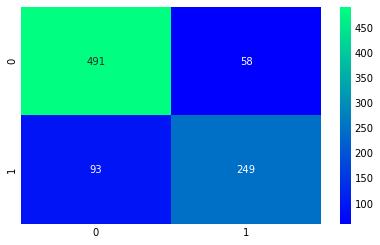

In [79]:
# Confusion Matrix for the Best Model 
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada, X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

[11:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


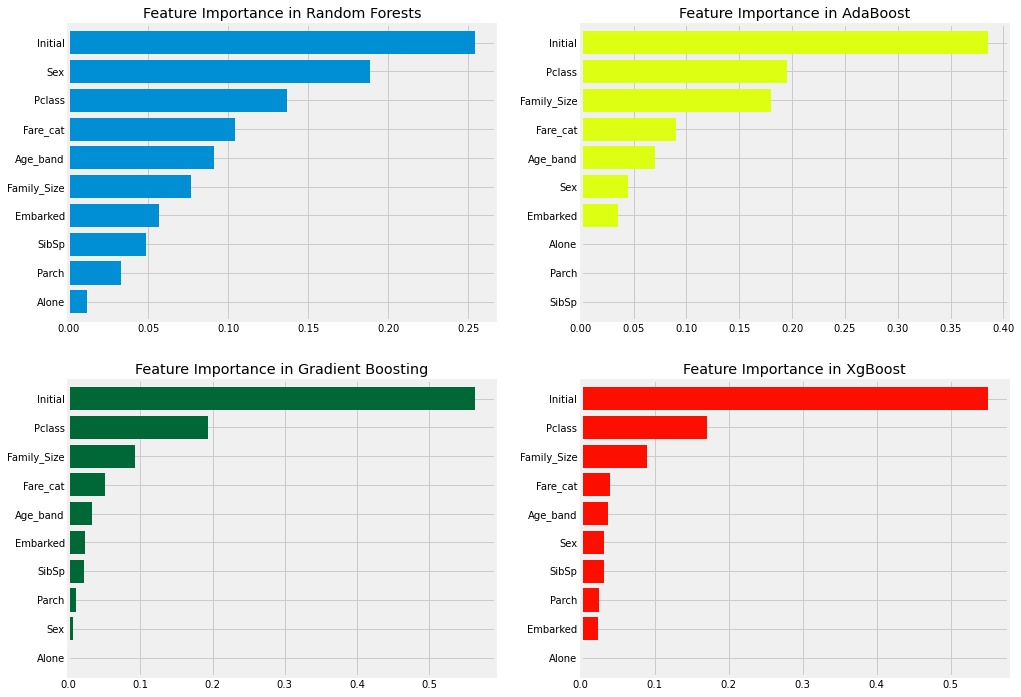

In [80]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()